In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import statsmodels
import warnings
warnings.filterwarnings('ignore')
from sklearn import set_config
set_config(print_changed_only=False)

In [2]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Sklearn version:',sklearn.__version__)
print('Statsmodels version:',statsmodels.__version__)

Numpy version: 1.20.3
Pandas version: 1.3.4
Seaborn version: 0.11.2
Matplotlib version: 3.4.3
Sklearn version: 0.24.2
Statsmodels version: 0.12.2


In [3]:
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.tools.eval_measures as em
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [4]:
df2 = pd.read_csv('Rose.csv')

In [5]:
df2.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [6]:
df2.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [7]:
df2 = pd.read_csv('Rose.csv', parse_dates = ['YearMonth'])
df2.head()

,YearMonth,Rose
0,1980-01-01,112.0
1,1980-02-01,118.0
2,1980-03-01,129.0
3,1980-04-01,99.0
4,1980-05-01,116.0


In [8]:
Time_Stamp = pd.date_range(start='1980-01-01',periods=len(df2),freq='M')
Time_Stamp

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [9]:
df2.drop('YearMonth', axis=1, inplace=True)
df2['YearMonth'] = Time_Stamp
df2.head()

,Rose,YearMonth
0,112.0,1980-01-31
1,118.0,1980-02-29
2,129.0,1980-03-31
3,99.0,1980-04-30
4,116.0,1980-05-31


In [10]:
df2.set_index('YearMonth',inplace=True,drop='YearMonth')
df2.head()

,Rose
YearMonth,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [11]:
df2.tail()

,Rose
YearMonth,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


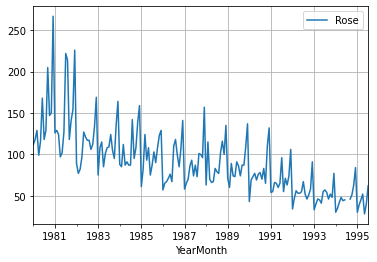

In [12]:
df2.plot(grid=True);

In [13]:
df2.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [14]:
df2.isna().sum()

Rose    2
dtype: int64

In [15]:
df2['1994']

,Rose
YearMonth,
1994-01-31,30.0
1994-02-28,35.0
1994-03-31,42.0
1994-04-30,48.0
1994-05-31,44.0
1994-06-30,45.0
1994-07-31,NaN
1994-08-31,NaN
1994-09-30,46.0


In [16]:
df2['1994'] = df2.interpolate(method = 'spline', order = 1)['1994']
df2['1994']

,Rose
YearMonth,
1994-01-31,30.000000
1994-02-28,35.000000
1994-03-31,42.000000
1994-04-30,48.000000
1994-05-31,44.000000
1994-06-30,45.000000
1994-07-31,46.155493
1994-08-31,47.221907
1994-09-30,46.000000


In [17]:
df2.isna().sum()

Rose    0
dtype: int64

In [18]:
df2.describe()

,Rose
count,187.000000
mean,89.927152
std,39.224081
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,7

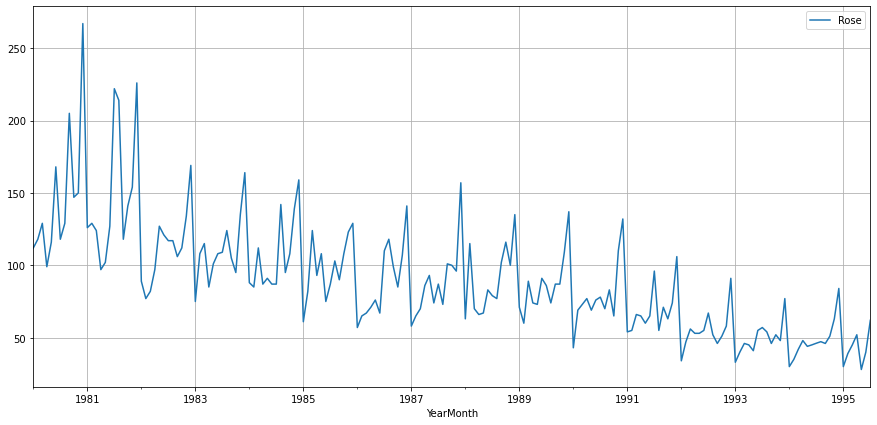

In [20]:
df2.plot(grid=True);

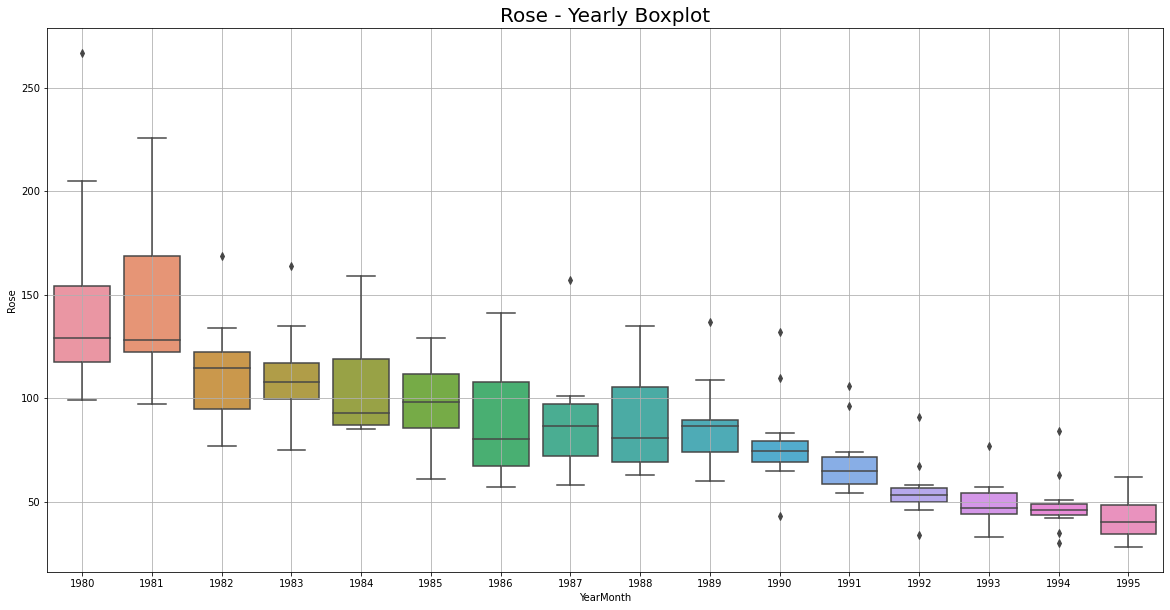

In [21]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = df2.index.year, y = df2['Rose'])
plt.title('Rose - Yearly Boxplot', fontsize=20)
plt.grid()
plt.show()

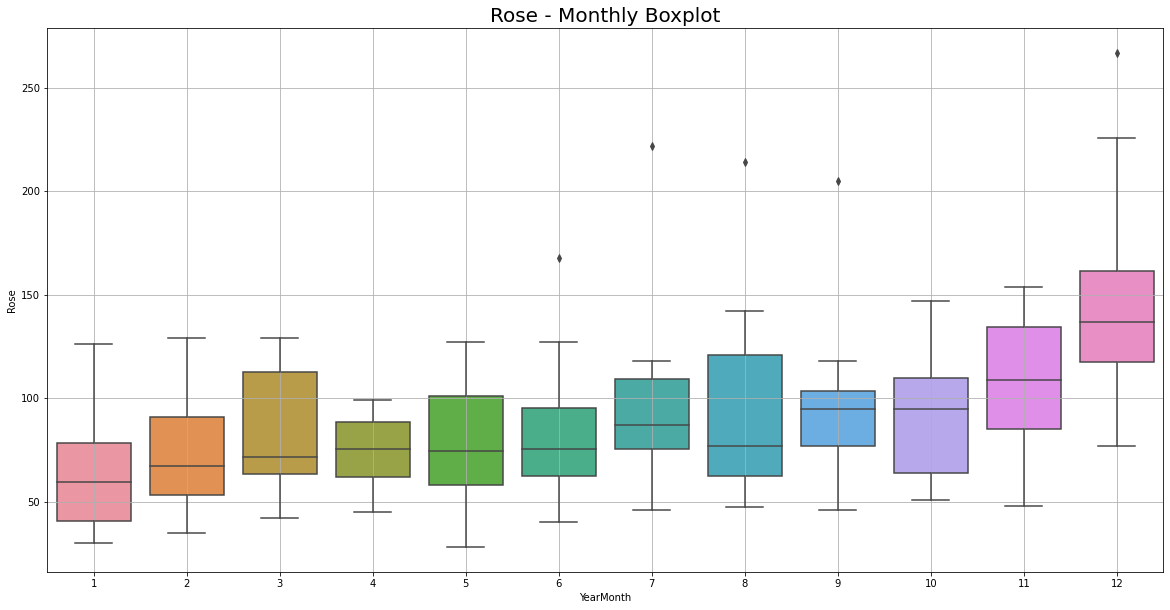

In [22]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = df2.index.month, y = df2['Rose'])
plt.title('Rose - Monthly Boxplot', fontsize=20)
plt.grid()
plt.show()

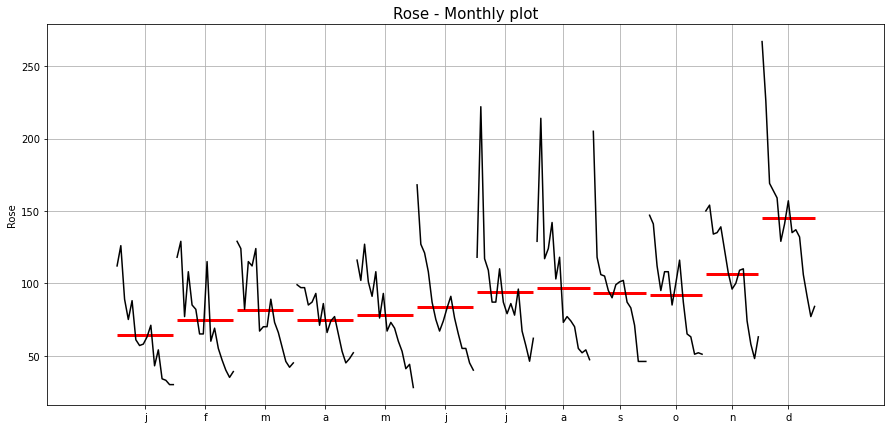

In [23]:
month_plot(df2, ylabel = 'Rose')
plt.title('Rose - Monthly plot', fontsize = 15)
plt.grid();

In [24]:
yearly_sales_across_months = pd.pivot_table(df2, values = 'Rose', columns = df2.index.month, 
                                        index = df2.index.year)
yearly_sales_across_months

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


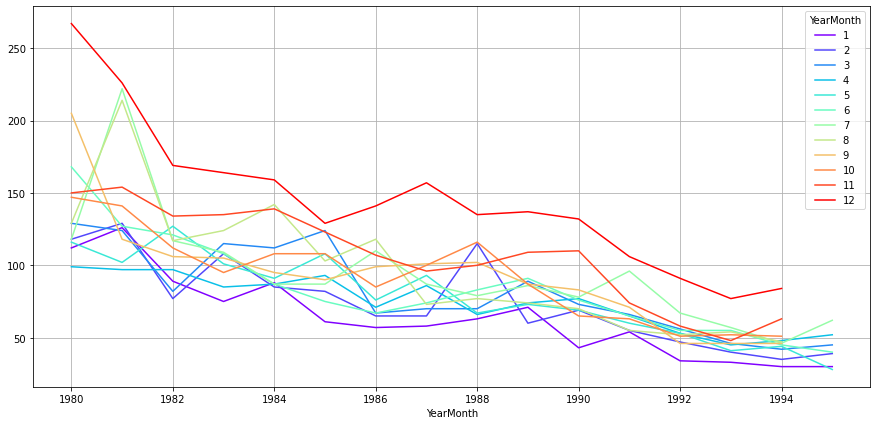

In [25]:
yearly_sales_across_months.plot(colormap='rainbow')
plt.grid();

In [26]:
df_yearly_sum = df2.resample('A').sum()
df_yearly_sum.head()

,Rose
YearMonth,
1980-12-31,1758.0
1981-12-31,1780.0
1982-12-31,1348.0
1983-12-31,1324.0
1984-12-31,1280.0


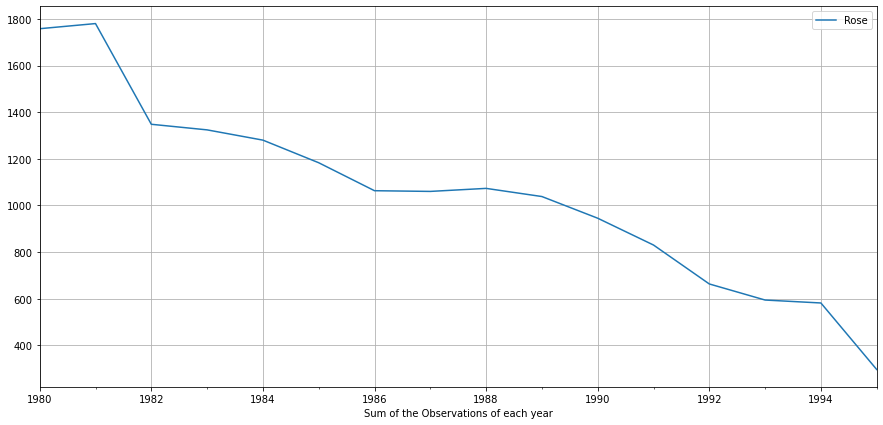

In [27]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [28]:
df_yearly_mean = df2.resample('Y').mean()
df_yearly_mean.head()

,Rose
YearMonth,
1980-12-31,146.500000
1981-12-31,148.333333
1982-12-31,112.333333
1983-12-31,110.333333
1984-12-31,106.666667


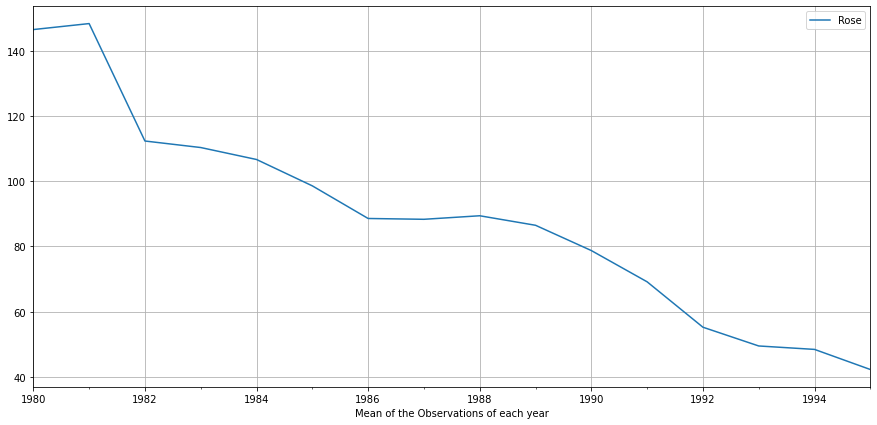

In [29]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

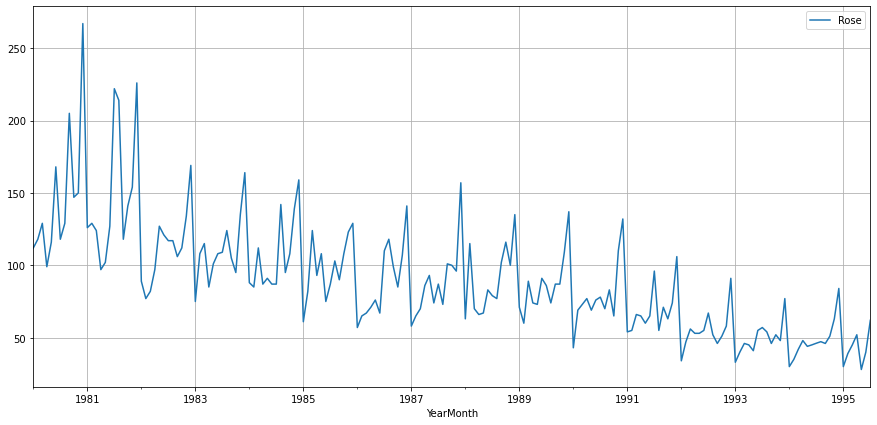

In [30]:
df2.plot()
plt.grid();

In [31]:
df_quarterly_sum = df2.resample('Q').sum()
df_quarterly_sum.head()

,Rose
YearMonth,
1980-03-31,359.0
1980-06-30,383.0
1980-09-30,452.0
1980-12-31,564.0
1981-03-31,379.0


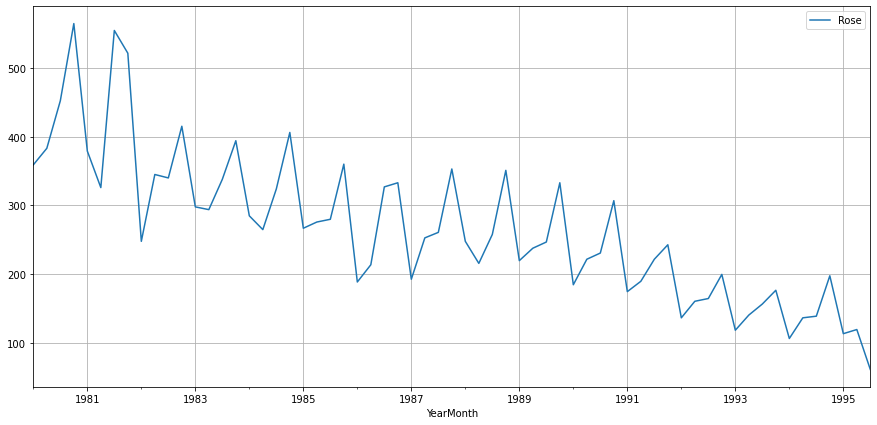

In [32]:
df_quarterly_sum.plot();
plt.grid()

In [33]:
df_quarterly_mean = df2.resample('Q').mean()
df_quarterly_mean.head()

,Rose
YearMonth,
1980-03-31,119.666667
1980-06-30,127.666667
1980-09-30,150.666667
1980-12-31,188.000000
1981-03-31,126.333333


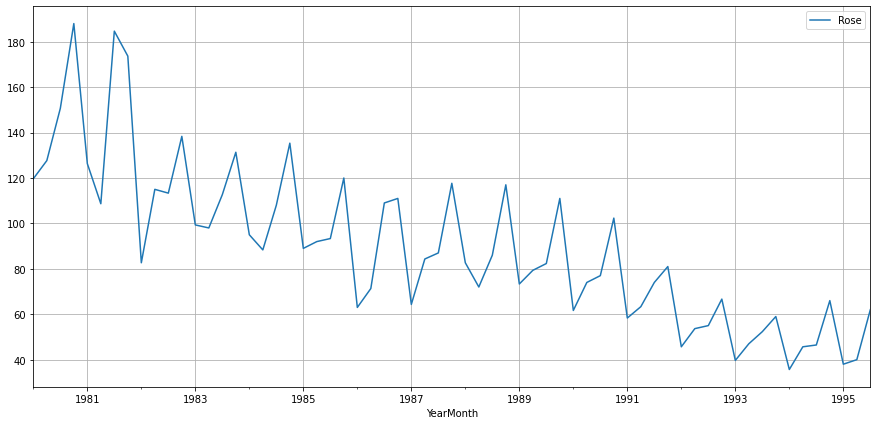

In [34]:
df_quarterly_mean.plot();
plt.grid()

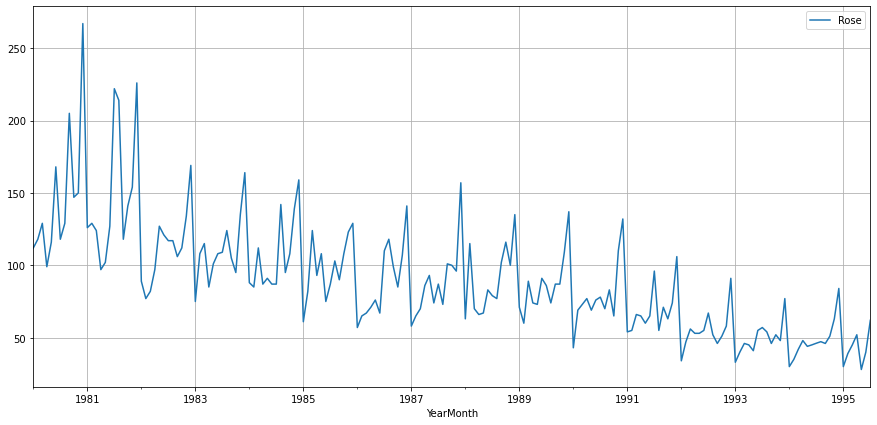

In [35]:
df2.plot()
plt.grid();

In [36]:
df_decade_sum = df2.resample('10Y').sum()
df_decade_sum

,Rose
YearMonth,
1980-12-31,1758.0000
1990-12-31,12094.0000
2000-12-31,2964.3774


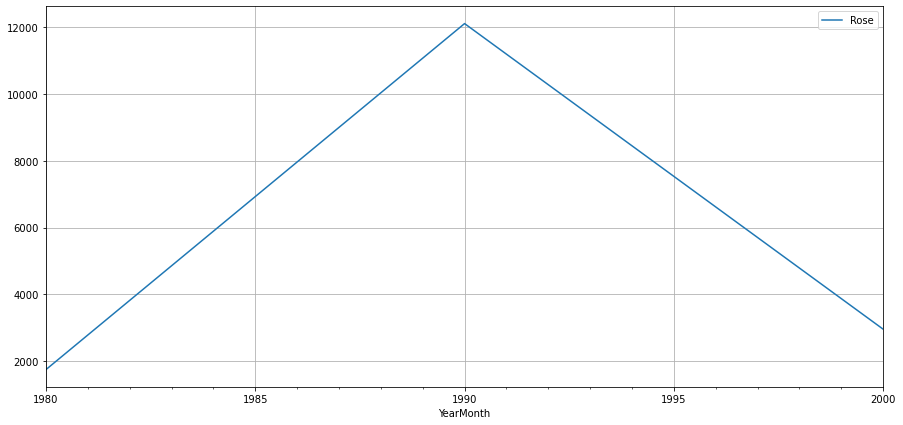

In [37]:
df_decade_sum.plot();
plt.grid()

In [38]:
df2_add_decompose = seasonal_decompose(df2, model = 'additive', period = 12)

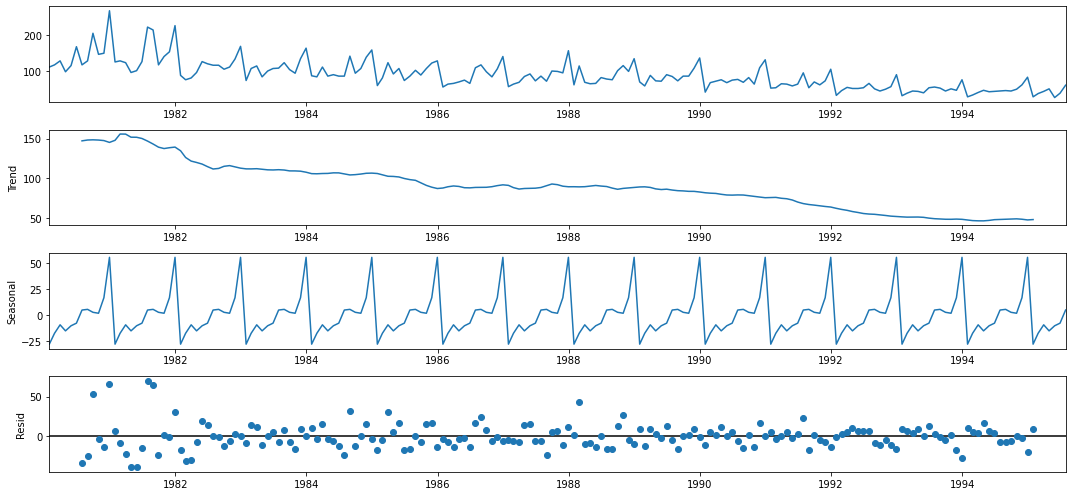

In [39]:
df2_add_decompose.plot()
plt.show()

In [40]:
trend = df2_add_decompose.trend
seasonality = df2_add_decompose.seasonal
residual = df2_add_decompose.resid

In [41]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31   -27.921848
1980-02-29   -17.445147
1980-03-31    -9.299974
1980-04-30   -15.112474
1980-05-31   -10.210688
1980-06-30    -7.692831
1980-07-31     4.938518
1980-08-31     5.590168
1980-09-30     2.761485
1980-10-31     1.858708
1980-11-30    16.833708
1980-12-31    55.700374
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -34.021852
1980-08-31   -24.715168
1980-09-30    53.863515
1980-10-31    -2.942041
1980-11-30   -14.250374
1980-12-31    66.17462

In [42]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(10)

YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    113.061482
1980-08-31    123.409832
1980-09-30    202.238515
1980-10-31    145.141292
dtype: float64

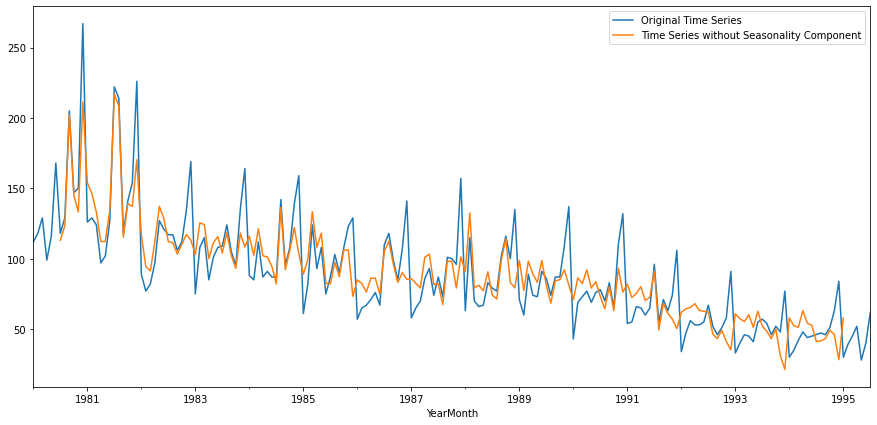

In [43]:
df2.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

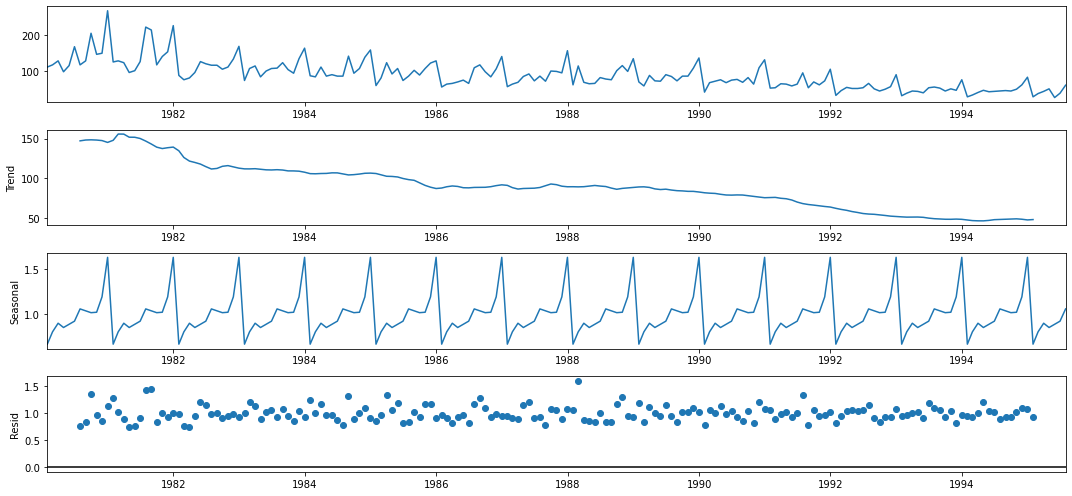

In [44]:
df2_mul_decompose = seasonal_decompose(df2, model = "multiplicative")
df2_mul_decompose.plot()
plt.show()

In [45]:
trend = df2_mul_decompose.trend
seasonality = df2_mul_decompose.seasonal
residual = df2_mul_decompose.resid

In [46]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    0.669945
1980-02-29    0.806018
1980-03-31    0.900897
1980-04-30    0.853717
1980-05-31    0.889141
1980-06-30    0.923716
1980-07-31    1.058922
1980-08-31    1.037766
1980-09-30    1.017401
1980-10-31    1.022301
1980-11-30    1.192005
1980-12-31    1.628171
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.757626
1980-08-31    0.839193
1980-09-30    1.358004
1980-10-31    0.971029
1980-11-30    0.853624
1980-12-31    1.129976
Name: resid, dtype: fl

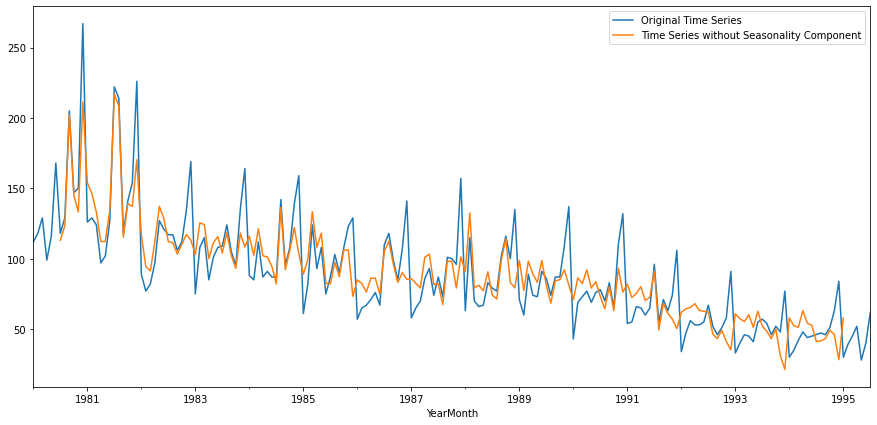

In [47]:
df2.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

In [48]:
train = df2[df2.index<'1991'] 
test = df2[df2.index>='1991']

In [49]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
YearMonth,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
YearMonth,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data


,Rose
YearMonth,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data


,Rose
YearMonth,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [50]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


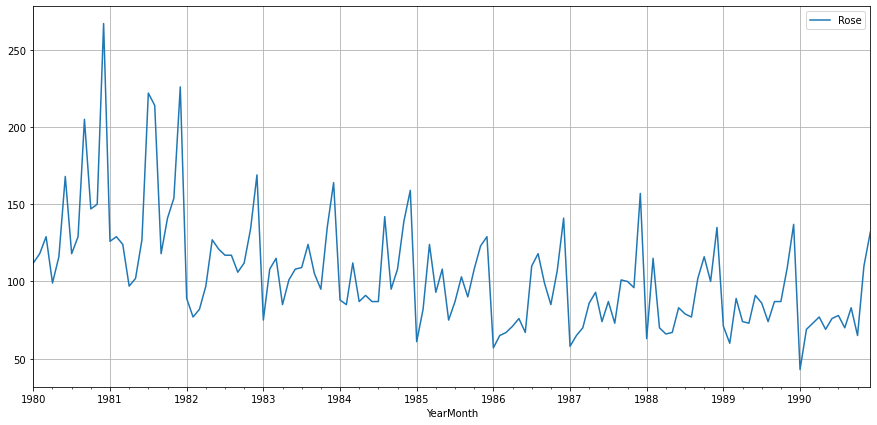

In [51]:
train.plot(grid=True);

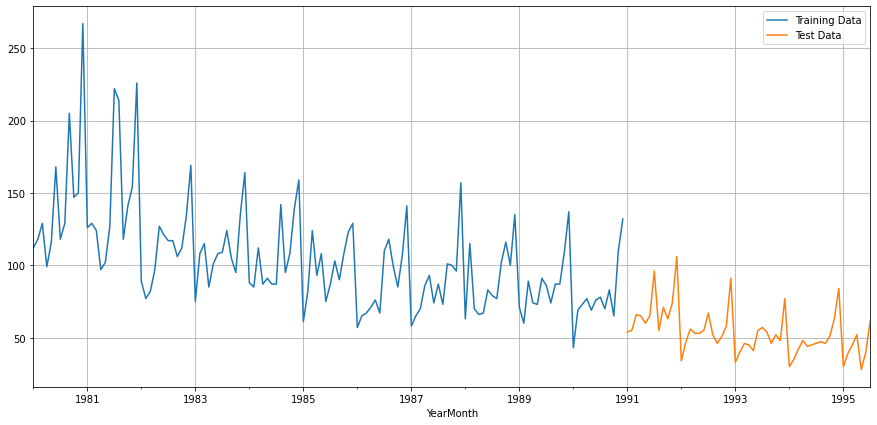

In [52]:
train['Rose'].plot()
test['Rose'].plot()
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [53]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [54]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [55]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Rose,time
YearMonth,,
1980-01-31,112.0,1
1980-02-29,118.0,2
1980-03-31,129.0,3
1980-04-30,99.0,4
1980-05-31,116.0,5


Last few rows of Training Data


,Rose,time
YearMonth,,
1990-08-31,70.0,128
1990-09-30,83.0,129
1990-10-31,65.0,130
1990-11-30,110.0,131
1990-12-31,132.0,132


First few rows of Test Data


,Rose,time
YearMonth,,
1991-01-31,54.0,133
1991-02-28,55.0,134
1991-03-31,66.0,135
1991-04-30,65.0,136
1991-05-31,60.0,137


Last few rows of Test Data


,Rose,time
YearMonth,,
1995-03-31,45.0,183
1995-04-30,52.0,184
1995-05-31,28.0,185
1995-06-30,40.0,186
1995-07-31,62.0,187


In [56]:
lr = LinearRegression()

In [57]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False,
                 positive=False)

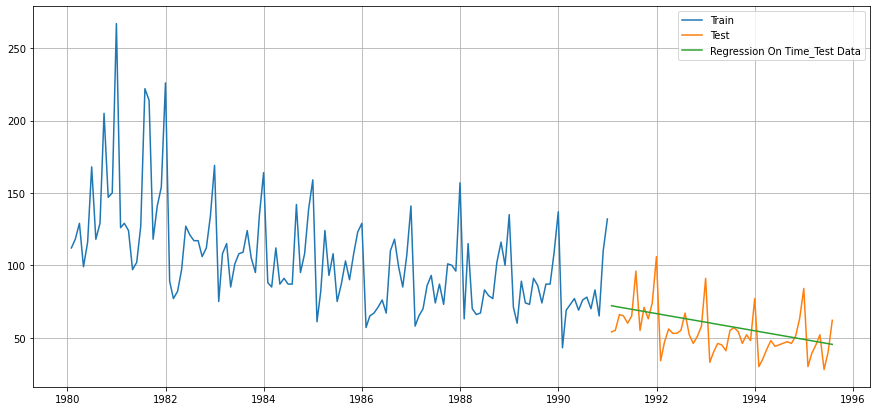

In [58]:
train_predictions_model1 = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [59]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.255 


In [60]:
resultsDf = pd.DataFrame({'RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,RMSE
RegressionOnTime,15.255435


In [61]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [62]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

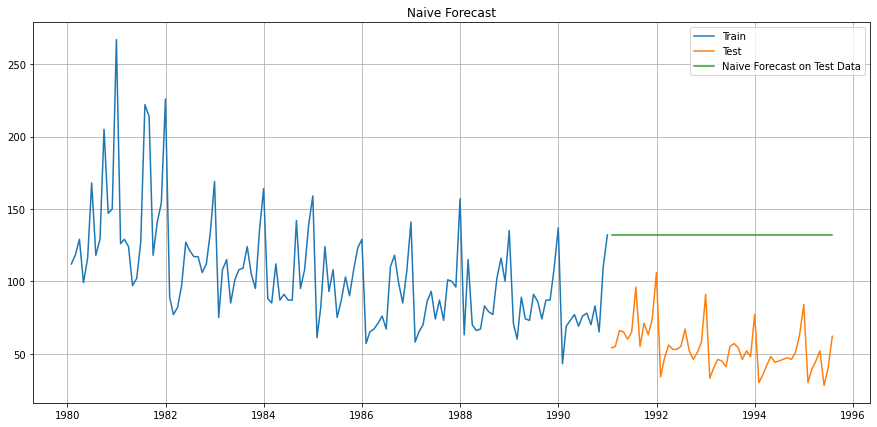

In [63]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [64]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.672


In [65]:
resultsDf_2 = pd.DataFrame({'RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238


In [66]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [67]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


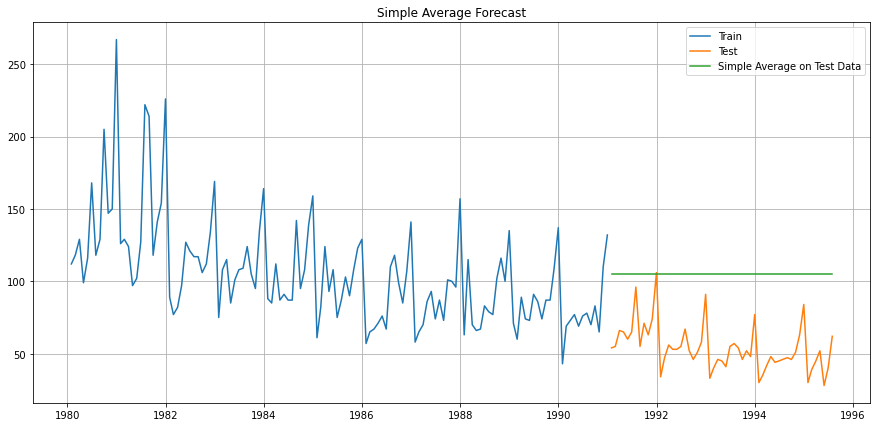

In [68]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [69]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.413


In [70]:
resultsDf_3 = pd.DataFrame({'RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057


In [71]:
MovingAverage = df2.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [72]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


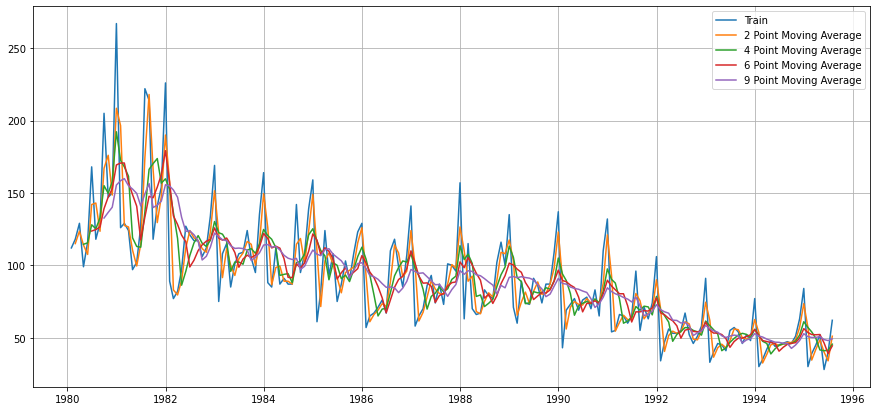

In [73]:
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [74]:
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991] 
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

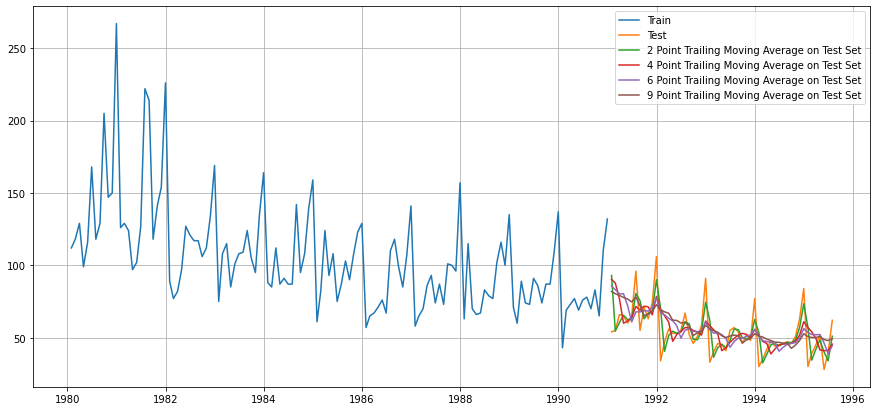

In [75]:
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [76]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))


rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))


rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))


rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.530
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.444
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.555
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.721


In [77]:
resultsDf_4 = pd.DataFrame({'RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057
2pointTrailingMovingAverage,11.529994
4pointTrailingMovingAverage,14.444342
6pointTrailingMovingAverage,14.554944
9pointTrailingMovingAverage,14.721499


In [78]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [79]:
model_SES_autofit = model_SES.fit(optimized=True)

In [80]:
model_SES_autofit.params

{'smoothing_level': 0.09874963957110783,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38708961485827,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [81]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-31    87.104992
1991-02-28    87.104992
1991-03-31    87.104992
1991-04-30    87.104992
1991-05-31    87.104992
1991-06-30    87.104992
1991-07-31    87.104992
1991-08-31    87.104992
1991-09-30    87.104992
1991-10-31    87.104992
1991-11-30    87.104992
1991-12-31    87.104992
1992-01-31    87.104992
1992-02-29    87.104992
1992-03-31    87.104992
1992-04-30    87.104992
1992-05-31    87.104992
1992-06-30    87.104992
1992-07-31    87.104992
1992-08-31    87.104992
1992-09-30    87.104992
1992-10-31    87.104992
1992-11-30    87.104992
1992-12-31    87.104992
1993-01-31    87.104992
1993-02-28    87.104992
1993-03-31    87.104992
1993-04-30    87.104992
1993-05-31    87.104992
1993-06-30    87.104992
1993-07-31    87.104992
1993-08-31    87.104992
1993-09-30    87.104992
1993-10-31    87.104992
1993-11-30    87.104992
1993-12-31    87.104992
1994-01-31    87.104992
1994-02-28    87.104992
1994-03-31    87.104992
1994-04-30    87.104992
1994-05-31    87.104992
1994-06-30    87

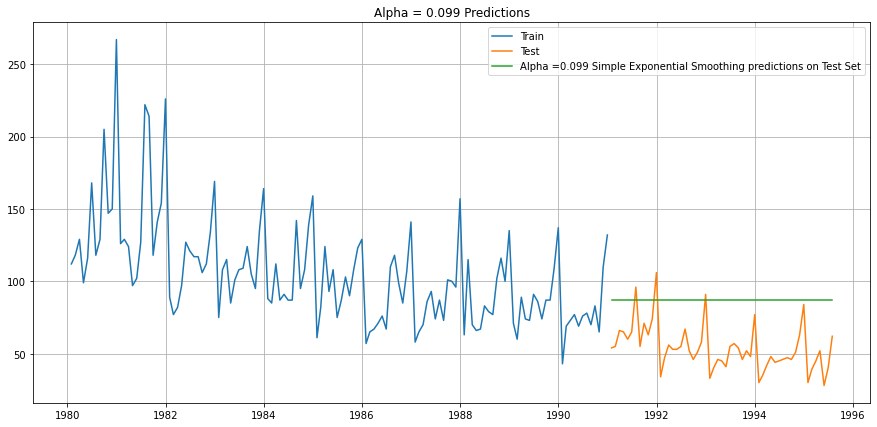

In [82]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.099 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.099 Predictions');

In [83]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [84]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))

print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 36.748154733118554
SES RMSE (calculated using statsmodels): 36.748154733118554


In [85]:
resultsDf_1 = pd.DataFrame({'RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.099,SES'])
resultsDf_1

,RMSE
"Alpha=0.099,SES",36.748155


In [86]:
model_DES = Holt(train,initialization_method='estimated')

model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters

{'smoothing_level': 1.4901247095597348e-08, 'smoothing_trend': 7.3896641488640725e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81551313502814, 'initial_trend': -0.4943777717865305, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [87]:
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-31    72.063269
1991-02-28    71.568892
1991-03-31    71.074514
1991-04-30    70.580136
1991-05-31    70.085758
1991-06-30    69.591381
1991-07-31    69.097003
1991-08-31    68.602625
1991-09-30    68.108247
1991-10-31    67.613870
1991-11-30    67.119492
1991-12-31    66.625114
1992-01-31    66.130736
1992-02-29    65.636358
1992-03-31    65.141981
1992-04-30    64.647603
1992-05-31    64.153225
1992-06-30    63.658847
1992-07-31    63.164470
1992-08-31    62.670092
1992-09-30    62.175714
1992-10-31    61.681336
1992-11-30    61.186959
1992-12-31    60.692581
1993-01-31    60.198203
1993-02-28    59.703825
1993-03-31    59.209447
1993-04-30    58.715070
1993-05-31    58.220692
1993-06-30    57.726314
1993-07-31    57.231936
1993-08-31    56.737559
1993-09-30    56.243181
1993-10-31    55.748803
1993-11-30    55.254425
1993-12-31    54.760047
1994-01-31    54.265670
1994-02-28    53.771292
1994-03-31    53.276914
1994-04-30    52.782536
1994-05-31    52.288159
1994-06-30    51

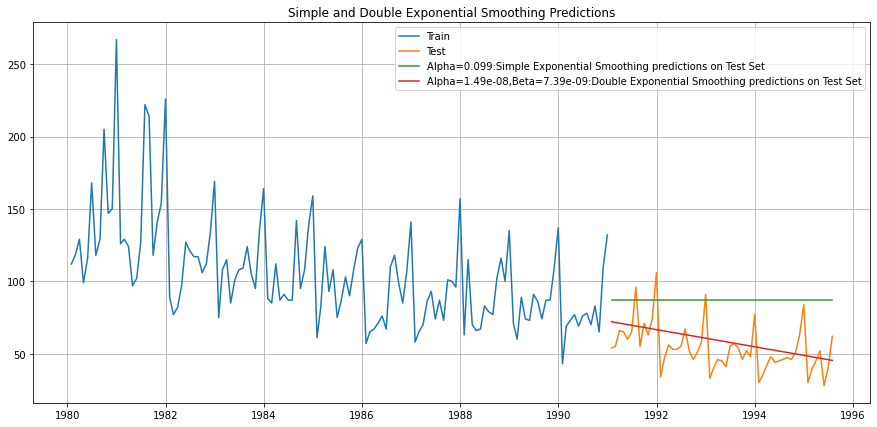

In [88]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.099:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=1.49e-08,Beta=7.39e-09:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [89]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 15.255436717071268


In [90]:
resultsDf_temp = pd.DataFrame({'RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1.49e-08,Beta=7.39e-09:DES'])

resultsDf_1 = pd.concat([resultsDf_1, resultsDf_temp])
resultsDf_1

,RMSE
"Alpha=0.099,SES",36.748155
"Alpha=1.49e-08,Beta=7.39e-09:DES",15.255437


In [91]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')

model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.09467987567540882, 'smoothing_trend': 2.31999683285252e-05, 'smoothing_seasonal': 0.0004175285691922314, 'damping_trend': nan, 'initial_level': 146.40142527639352, 'initial_trend': -0.5464913833622084, 'initial_seasons': array([-31.19268548, -18.83344765, -10.84745053, -21.48718886,
       -12.67654312,  -7.19154248,   2.65454402,   8.80233514,
         4.79913097,   2.91389547,  21.00157004,  63.18716583]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [92]:
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-31     42.716117
1991-02-28     54.528923
1991-03-31     61.968476
1991-04-30     50.782306
1991-05-31     59.046436
1991-06-30     63.984756
1991-07-31     73.284643
1991-08-31     78.885632
1991-09-30     74.336035
1991-10-31     71.904228
1991-11-30     89.445446
1991-12-31    131.087464
1992-01-31     36.158278
1992-02-29     47.971084
1992-03-31     55.410637
1992-04-30     44.224467
1992-05-31     52.488597
1992-06-30     57.426917
1992-07-31     66.726804
1992-08-31     72.327793
1992-09-30     67.778196
1992-10-31     65.346389
1992-11-30     82.887606
1992-12-31    124.529625
1993-01-31     29.600439
1993-02-28     41.413245
1993-03-31     48.852798
1993-04-30     37.666628
1993-05-31     45.930758
1993-06-30     50.869078
1993-07-31     60.168965
1993-08-31     65.769954
1993-09-30     61.220357
1993-10-31     58.788550
1993-11-30     76.329767
1993-12-31    117.971785
1994-01-31     23.042600
1994-02-28     34.855406
1994-03-31     42.294959
1994-04-30     31.108789


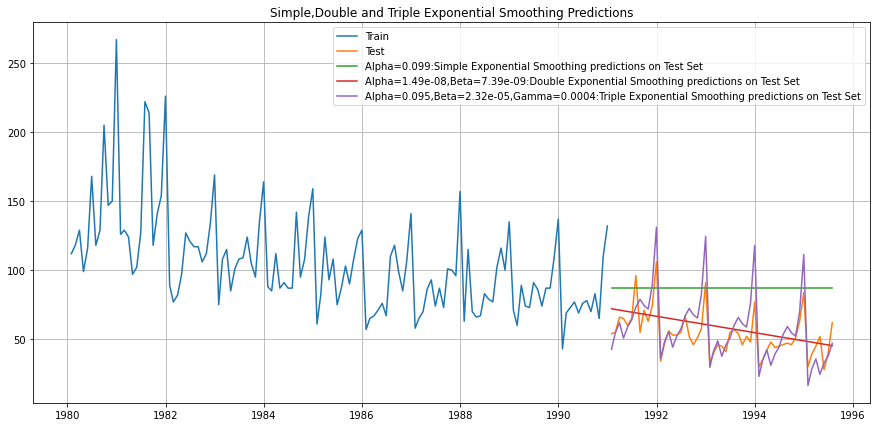

In [93]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.099:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=1.49e-08,Beta=7.39e-09:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.095,Beta=2.32e-05,Gamma=0.0004:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [94]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 14.24487966159066


In [95]:
resultsDf_temp = pd.DataFrame({'RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.095,Beta=2.32e-05,Gamma=0.0004:TES'])

resultsDf_1 = pd.concat([resultsDf_1, resultsDf_temp])
resultsDf_1

,RMSE
"Alpha=0.099,SES",36.748155
"Alpha=1.49e-08,Beta=7.39e-09:DES",15.255437
"Alpha=0.095,Beta=2.32e-05,Gamma=0.0004:TES",14.244880


In [96]:
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')

model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07130285749243212, 'smoothing_trend': 0.04550837652110988, 'smoothing_seasonal': 8.385716703273524e-05, 'damping_trend': nan, 'initial_level': 163.60092654560762, 'initial_trend': -0.9804841883026134, 'initial_seasons': array([0.68714163, 0.77936108, 0.85184662, 0.74446365, 0.8372947 ,
       0.91182237, 1.00282327, 1.06745268, 1.01025249, 0.98957378,
       1.1535151 , 1.59037115]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [97]:
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-31     56.332862
1991-02-28     63.693063
1991-03-31     69.394575
1991-04-30     60.454513
1991-05-31     67.772390
1991-06-30     73.563907
1991-07-31     80.645116
1991-08-31     85.563629
1991-09-30     80.718288
1991-10-31     78.808929
1991-11-30     91.565566
1991-12-31    125.823875
1992-01-31     54.185254
1992-02-29     61.257120
1992-03-31     66.732091
1992-04-30     58.127595
1992-05-31     65.155411
1992-06-30     70.714123
1992-07-31     77.510896
1992-08-31     82.227449
1992-09-30     77.560771
1992-10-31     75.716019
1992-11-30     87.960222
1992-12-31    120.853321
1993-01-31     52.037646
1993-02-28     58.821176
1993-03-31     64.069608
1993-04-30     55.800678
1993-05-31     62.538432
1993-06-30     67.864338
1993-07-31     74.376675
1993-08-31     78.891269
1993-09-30     74.403254
1993-10-31     72.623110
1993-11-30     84.354879
1993-12-31    115.882766
1994-01-31     49.890039
1994-02-28     56.385233
1994-03-31     61.407124
1994-04-30     53.473761


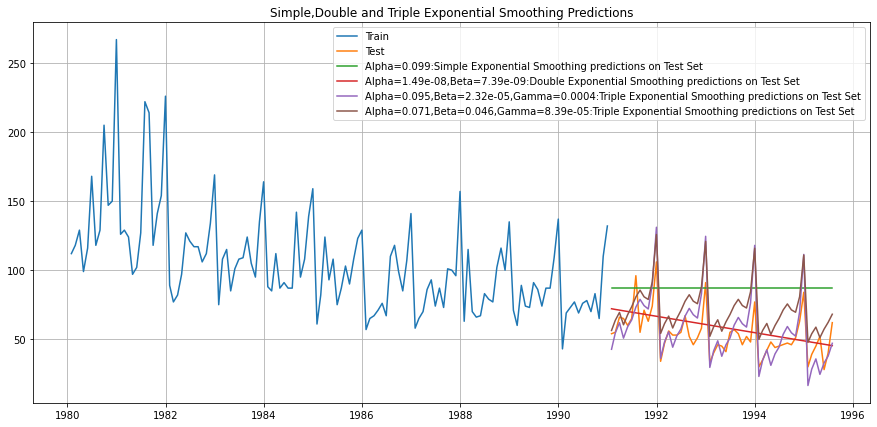

In [98]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.099:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=1.49e-08,Beta=7.39e-09:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.095,Beta=2.32e-05,Gamma=0.0004:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.071,Beta=0.046,Gamma=8.39e-05:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [99]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 20.13002567676232


In [100]:
resultsDf_temp = pd.DataFrame({'RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.071,Beta=0.046,Gamma=8.39e-05:TES'])

resultsDf_1 = pd.concat([resultsDf_1, resultsDf_temp])
resultsDf_1

,RMSE
"Alpha=0.099,SES",36.748155
"Alpha=1.49e-08,Beta=7.39e-09:DES",15.255437
"Alpha=0.095,Beta=2.32e-05,Gamma=0.0004:TES",14.244880
"Alpha=0.071,Beta=0.046,Gamma=8.39e-05:TES",20.130026


In [101]:
resultsDf = pd.concat([resultsDf, resultsDf_1])
resultsDf

,RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057
2pointTrailingMovingAverage,11.529994
4pointTrailingMovingAverage,14.444342
6pointTrailingMovingAverage,14.554944
9pointTrailingMovingAverage,14.721499
"Alpha=0.099,SES",36.748155
"Alpha=1.49e-08,Beta=7.39e-09:DES",15.255437
"Alpha=0.095,Beta=2.32e-05,Gamma=0.0004:TES",14.244880


In [102]:
dftest = adfuller(df2,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.240
DF test p-value is 0.46755392431131565
Number of lags used 13


In [103]:
dftest = adfuller(df2.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -8.164
DF test p-value is 2.990289942972373e-11
Number of lags used 12


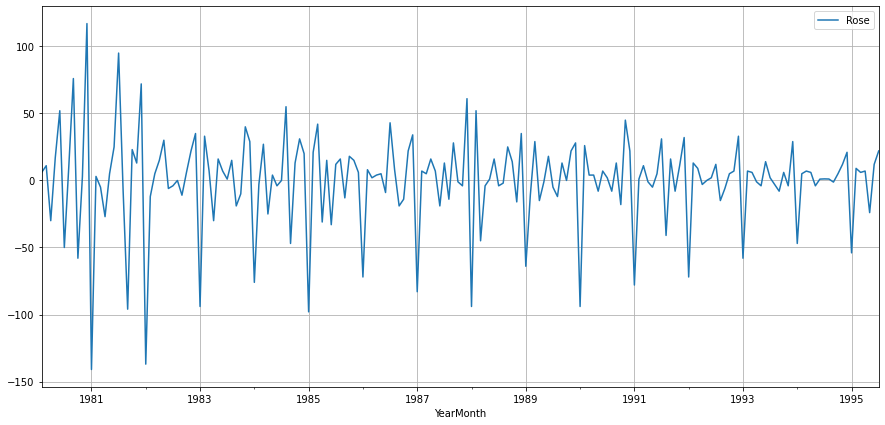

In [104]:
df2.diff().dropna().plot(grid=True);

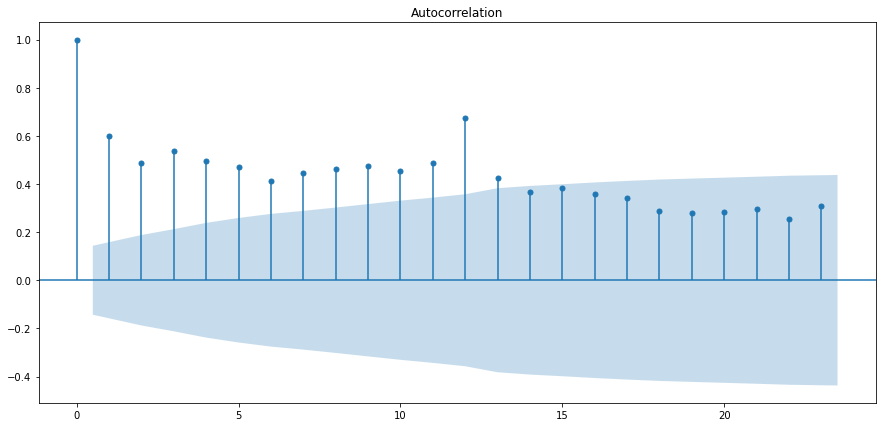

In [105]:
plot_acf(df2, alpha = 0.05);

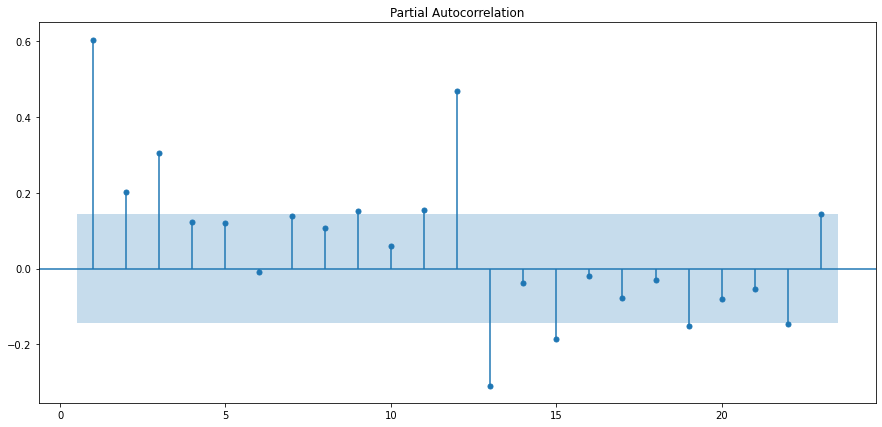

In [106]:
plot_pacf(df2, zero = False, alpha = 0.05);

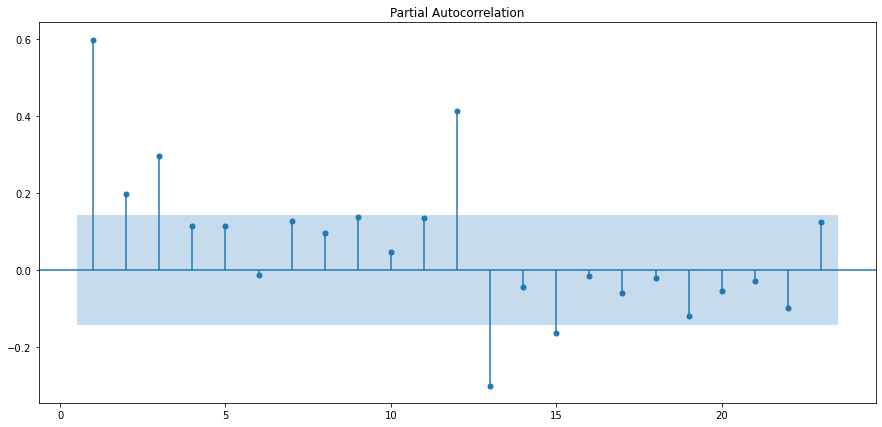

In [107]:
plot_pacf(df2, zero = False, alpha = 0.05, method = 'ywmle');

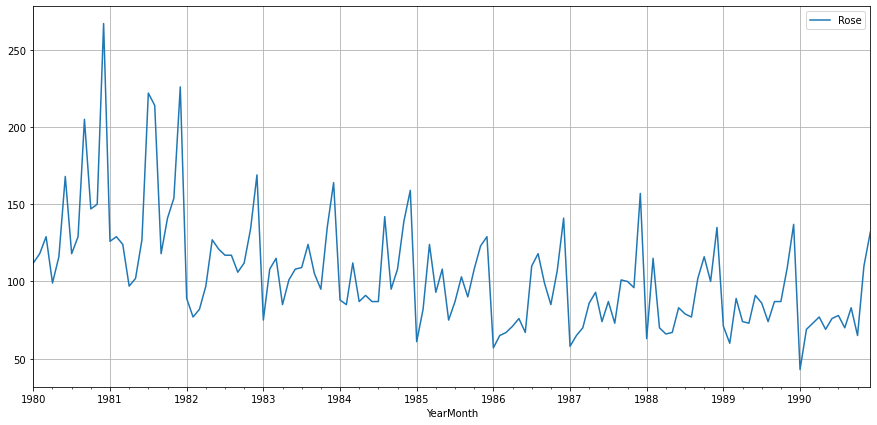

In [108]:
train.plot(grid=True);

In [109]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051047106
Number of lags used 13


In [110]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.804
DF test p-value is 3.894831356781761e-08
Number of lags used 12


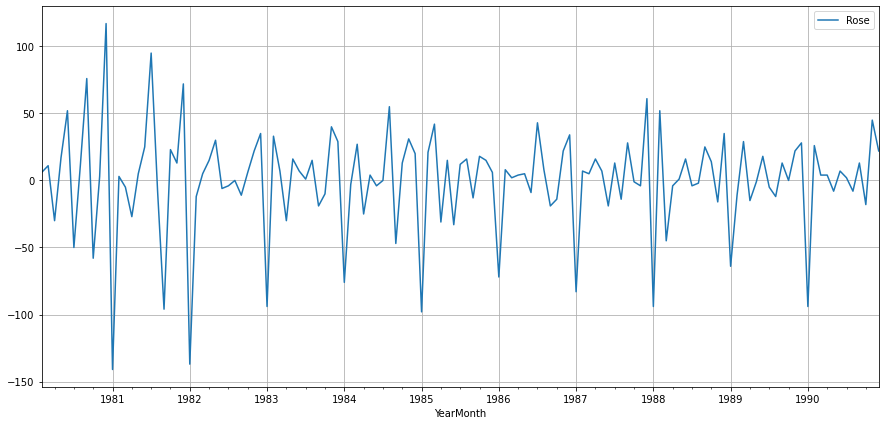

In [111]:
train.diff().dropna().plot(grid=True);

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [113]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [114]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [115]:
for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748299
ARIMA(0, 1, 2) - AIC:1279.6715288535765
ARIMA(0, 1, 3) - AIC:1280.5453761734668
ARIMA(1, 1, 0) - AIC:1317.3503105381546
ARIMA(1, 1, 1) - AIC:1280.5742295380073
ARIMA(1, 1, 2) - AIC:1279.8707234231897
ARIMA(1, 1, 3) - AIC:1281.8707223309998
ARIMA(2, 1, 0) - AIC:1298.6110341604983
ARIMA(2, 1, 1) - AIC:1281.5078621868424
ARIMA(2, 1, 2) - AIC:1281.8707222264402


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:1274.6953561209548
ARIMA(3, 1, 0) - AIC:1297.4810917271725
ARIMA(3, 1, 1) - AIC:1282.4192776271946
ARIMA(3, 1, 2) - AIC:1283.720740597711
ARIMA(3, 1, 3) - AIC:1278.6619652725685


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [116]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
11,"(2, 1, 3)",1274.695356
15,"(3, 1, 3)",1278.661965
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376


In [117]:
auto_ARIMA = ARIMA(train, order=(2,1,3))
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Tue, 13 Dec 2022   AIC                           1274.695
Time:                        06:03:42   BIC                           1291.947
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6781      0.084    -19.992      0.000      -1.843      -1.514
ar.L2         -0.7289      0.084     -8.684      0.000      -0.893      -0.564
ma.L1          1.0446      0.628      1.665      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


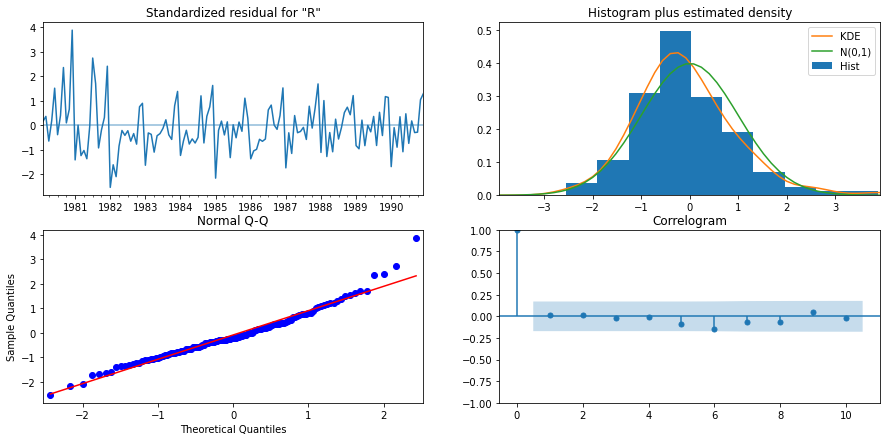

In [118]:
results_auto_ARIMA.plot_diagnostics();

In [119]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [120]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [121]:
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.76557245696845 
MAPE: 75.66387131946782


In [122]:
resultsDf2 = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,3)'])
resultsDf2

,RMSE,MAPE
"ARIMA(2,1,3)",36.765572,75.663871


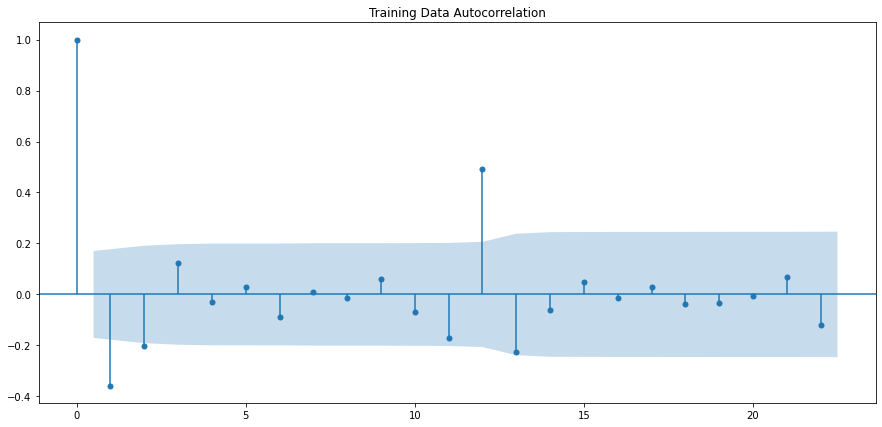

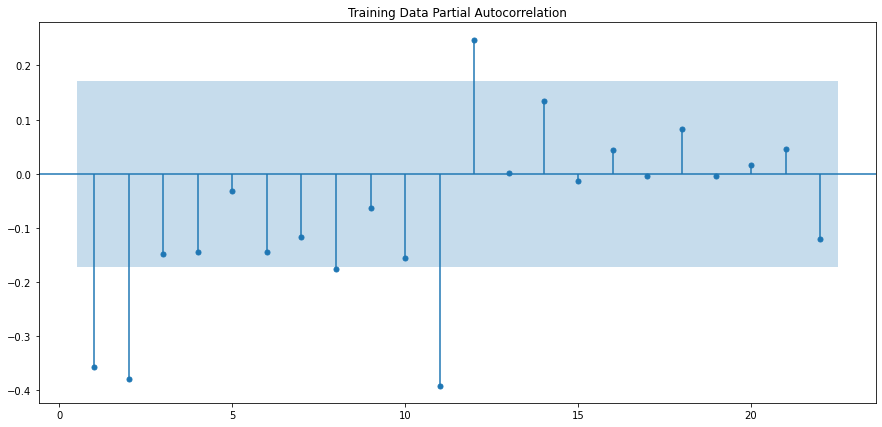

In [123]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

In [124]:
manual_ARIMA = ARIMA(train['Rose'], order=(3,1,3))
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -632.331
Date:                Tue, 13 Dec 2022   AIC                           1278.662
Time:                        06:03:44   BIC                           1298.788
Sample:                    01-31-1980   HQIC                          1286.840
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5838      0.088    -17.978      0.000      -1.756      -1.411
ar.L2         -0.6403      0.142     -4.517      0.000      -0.918      -0.362
ar.L3          0.1326      0.089      1.487      0.1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


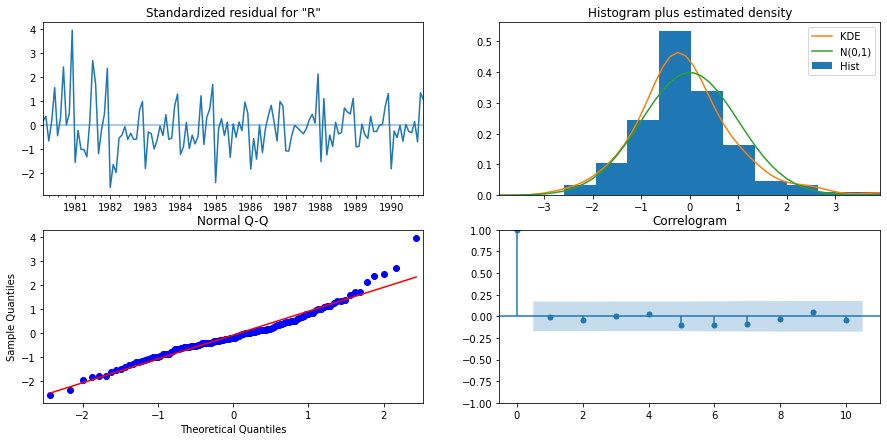

In [125]:
results_manual_ARIMA.plot_diagnostics();

In [126]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [127]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.6500072223944 
MAPE: 75.35665109194682


In [128]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,1,3)'])
resultsDf2 = pd.concat([resultsDf2,temp_resultsDf])
resultsDf2

,RMSE,MAPE
"ARIMA(2,1,3)",36.765572,75.663871
"ARIMA(3,1,3)",36.650007,75.356651


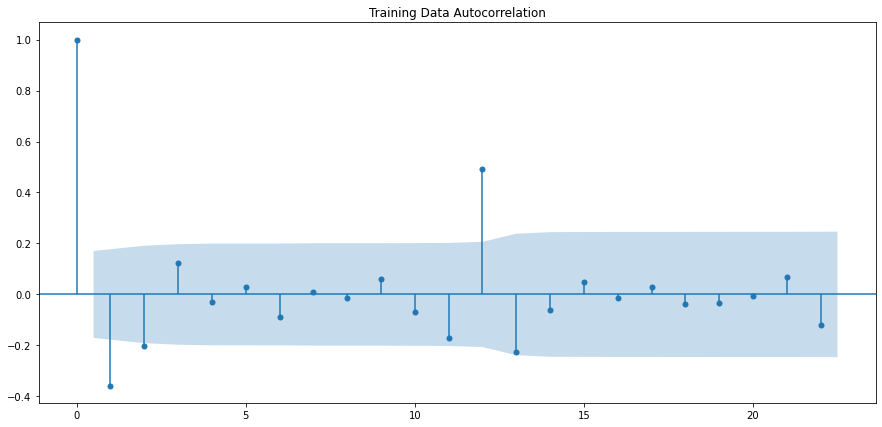

In [129]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

In [130]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [131]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [132]:
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1171.2013438278946
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:965.505730164378
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:845.8687014776131


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 1, 3, 12) - AIC:2967.837130084718
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:982.3269589658809
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:975.3375383601609
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:847.7332182654717


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 1, 3, 12) - AIC:3181.742327994016
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:858.5132698374412
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:853.3390729143485
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:842.6282244223457


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 1, 3, 12) - AIC:2264.962406665594
SARIMA(0, 1, 0)x(3, 1, 0, 12) - AIC:752.39581227398
SARIMA(0, 1, 0)x(3, 1, 1, 12) - AIC:748.316524649097
SARIMA(0, 1, 0)x(3, 1, 2, 12) - AIC:748.9721713401693
SARIMA(0, 1, 0)x(3, 1, 3, 12) - AIC:2702.9923787259922
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1113.7663133562082
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:915.0730606717843
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:790.9032809267121


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 1, 3, 12) - AIC:3200.589215129686
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:944.2456655530342
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:929.3362488520092
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:792.7161670346244


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 1, 3, 12) - AIC:144.9030791622591
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:810.3194350158656
SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:804.1555753766124
SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:782.1538715117415


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 1, 3, 12) - AIC:3336.3125618819745
SARIMA(0, 1, 1)x(3, 1, 0, 12) - AIC:708.0834235877855
SARIMA(0, 1, 1)x(3, 1, 1, 12) - AIC:699.7496865196659
SARIMA(0, 1, 1)x(3, 1, 2, 12) - AIC:701.2070503129079
SARIMA(0, 1, 1)x(3, 1, 3, 12) - AIC:3292.079535445334
SARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC:1098.6598024316877
SARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC:904.5003488472469
SARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:784.0140955703869


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 1, 3, 12) - AIC:3248.759747259705
SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:941.5256923362678
SARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:915.2731134090627
SARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:785.8237144293408


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 1, 3, 12) - AIC:89.11552382813285
SARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:811.5489438178314
SARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:805.1158488730321
SARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:774.9691201441359


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 1, 3, 12) - AIC:2407.698520990237
SARIMA(0, 1, 2)x(3, 1, 0, 12) - AIC:709.6122118422065
SARIMA(0, 1, 2)x(3, 1, 1, 12) - AIC:701.7009892590025
SARIMA(0, 1, 2)x(3, 1, 2, 12) - AIC:703.0331039503876


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 1, 3, 12) - AIC:4168.264489407762
SARIMA(0, 1, 3)x(0, 1, 0, 12) - AIC:1088.376471013649
SARIMA(0, 1, 3)x(0, 1, 1, 12) - AIC:897.131787389288
SARIMA(0, 1, 3)x(0, 1, 2, 12) - AIC:778.4427567866366


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 1, 3, 12) - AIC:3786.4700150902513
SARIMA(0, 1, 3)x(1, 1, 0, 12) - AIC:943.5043088714334
SARIMA(0, 1, 3)x(1, 1, 1, 12) - AIC:904.9319970114584
SARIMA(0, 1, 3)x(1, 1, 2, 12) - AIC:780.2386079740921


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 1, 3, 12) - AIC:1333.8661612190244
SARIMA(0, 1, 3)x(2, 1, 0, 12) - AIC:813.4051893208972
SARIMA(0, 1, 3)x(2, 1, 1, 12) - AIC:806.4667725223984
SARIMA(0, 1, 3)x(2, 1, 2, 12) - AIC:767.2243745742168


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 1, 3, 12) - AIC:3871.642658351335
SARIMA(0, 1, 3)x(3, 1, 0, 12) - AIC:711.7218300804425
SARIMA(0, 1, 3)x(3, 1, 1, 12) - AIC:703.6693202860646
SARIMA(0, 1, 3)x(3, 1, 2, 12) - AIC:705.3784447931728


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 1, 3, 12) - AIC:3188.9076819816687
SARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1164.5103013842013
SARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:953.8813887547439
SARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC:828.839883282132


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 1, 3, 12) - AIC:3384.9933034395813
SARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:962.9698535736063
SARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:964.8516934823651
SARIMA(1, 1, 0)x(1, 1, 2, 12) - AIC:830.3075804966375
SARIMA(1, 1, 0)x(1, 1, 3, 12) - AIC:5774.8441176203105
SARIMA(1, 1, 0)x(2, 1, 0, 12) - AIC:826.9995808091127
SARIMA(1, 1, 0)x(2, 1, 1, 12) - AIC:823.8261102782959
SARIMA(1, 1, 0)x(2, 1, 2, 12) - AIC:825.0437253085973


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 1, 3, 12) - AIC:3518.539453403109
SARIMA(1, 1, 0)x(3, 1, 0, 12) - AIC:727.3669084127101
SARIMA(1, 1, 0)x(3, 1, 1, 12) - AIC:728.903469043924
SARIMA(1, 1, 0)x(3, 1, 2, 12) - AIC:721.9926158573575


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 1, 3, 12) - AIC:3538.354365178373
SARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:1110.6209464400056
SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:914.045384498808
SARIMA(1, 1, 1)x(0, 1, 2, 12) - AIC:792.3411370856546
SARIMA(1, 1, 1)x(0, 1, 3, 12) - AIC:3279.91983409821
SARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:933.2974216823696
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:927.2920638200452
SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:794.1929706684577


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 1, 3, 12) - AIC:243.41438447005413
SARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:799.9474258320881
SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:791.9065436334079
SARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:783.8990945878464
SARIMA(1, 1, 1)x(2, 1, 3, 12) - AIC:3331.04648352363
SARIMA(1, 1, 1)x(3, 1, 0, 12) - AIC:702.1669809953612
SARIMA(1, 1, 1)x(3, 1, 1, 12) - AIC:693.9370824544633
SARIMA(1, 1, 1)x(3, 1, 2, 12) - AIC:695.0475172664666


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 1, 3, 12) - AIC:3626.7491192821126
SARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC:1096.3571024949918
SARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC:906.4966907625248
SARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:785.9832738671731
SARIMA(1, 1, 2)x(0, 1, 3, 12) - AIC:3055.9301285107827
SARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:934.8870392437872
SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:917.2527818408075
SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:787.7843970222305


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 1, 3, 12) - AIC:1479.111540727702
SARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:801.9382052143811
SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:791.9171139250981
SARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:776.9401151792707
SARIMA(1, 1, 2)x(2, 1, 3, 12) - AIC:3277.0214748070794
SARIMA(1, 1, 2)x(3, 1, 0, 12) - AIC:703.8075522594689
SARIMA(1, 1, 2)x(3, 1, 1, 12) - AIC:696.1085677313125
SARIMA(1, 1, 2)x(3, 1, 2, 12) - AIC:697.2354670556556


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 1, 3, 12) - AIC:1658.9146403326552
SARIMA(1, 1, 3)x(0, 1, 0, 12) - AIC:1088.0914860029723
SARIMA(1, 1, 3)x(0, 1, 1, 12) - AIC:895.9867971267337
SARIMA(1, 1, 3)x(0, 1, 2, 12) - AIC:780.3059561910892


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 1, 3, 12) - AIC:2771.5034840862
SARIMA(1, 1, 3)x(1, 1, 0, 12) - AIC:936.6664092075843
SARIMA(1, 1, 3)x(1, 1, 1, 12) - AIC:906.7653660394104
SARIMA(1, 1, 3)x(1, 1, 2, 12) - AIC:782.1027704581354
SARIMA(1, 1, 3)x(1, 1, 3, 12) - AIC:18.0
SARIMA(1, 1, 3)x(2, 1, 0, 12) - AIC:803.661620720247
SARIMA(1, 1, 3)x(2, 1, 1, 12) - AIC:793.9162133189362
SARIMA(1, 1, 3)x(2, 1, 2, 12) - AIC:767.4753542781114


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 1, 3, 12) - AIC:3162.9085962539057
SARIMA(1, 1, 3)x(3, 1, 0, 12) - AIC:702.934308866081
SARIMA(1, 1, 3)x(3, 1, 1, 12) - AIC:696.4191782810731
SARIMA(1, 1, 3)x(3, 1, 2, 12) - AIC:698.0867416889901


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 1, 3, 12) - AIC:312.16021802719285
SARIMA(2, 1, 0)x(0, 1, 0, 12) - AIC:1133.2467704396645
SARIMA(2, 1, 0)x(0, 1, 1, 12) - AIC:949.5332566880415
SARIMA(2, 1, 0)x(0, 1, 2, 12) - AIC:827.1933387102574


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 1, 3, 12) - AIC:3240.406265403574
SARIMA(2, 1, 0)x(1, 1, 0, 12) - AIC:950.2637728230156
SARIMA(2, 1, 0)x(1, 1, 1, 12) - AIC:952.2623518887166
SARIMA(2, 1, 0)x(1, 1, 2, 12) - AIC:828.719870094184
SARIMA(2, 1, 0)x(1, 1, 3, 12) - AIC:5754.5111222554115
SARIMA(2, 1, 0)x(2, 1, 0, 12) - AIC:814.2969261794736
SARIMA(2, 1, 0)x(2, 1, 1, 12) - AIC:808.510091494271
SARIMA(2, 1, 0)x(2, 1, 2, 12) - AIC:810.0074804176695


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 1, 3, 12) - AIC:3210.097911204131
SARIMA(2, 1, 0)x(3, 1, 0, 12) - AIC:714.7788976437362
SARIMA(2, 1, 0)x(3, 1, 1, 12) - AIC:705.0868021423696
SARIMA(2, 1, 0)x(3, 1, 2, 12) - AIC:707.1846915308994
SARIMA(2, 1, 0)x(3, 1, 3, 12) - AIC:3267.322840593802
SARIMA(2, 1, 1)x(0, 1, 0, 12) - AIC:1107.1166362359763
SARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC:915.1236479111577
SARIMA(2, 1, 1)x(0, 1, 2, 12) - AIC:794.27996262775


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 1, 3, 12) - AIC:3020.0829253229185
SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:926.319703626804
SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:928.3197020908623
SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:796.1300001391998
SARIMA(2, 1, 1)x(1, 1, 3, 12) - AIC:5688.241386051832
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:792.8940753934386
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:784.892805137669
SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:785.8335673745698
SARIMA(2, 1, 1)x(2, 1, 3, 12) - AIC:3540.205976280984
SARIMA(2, 1, 1)x(3, 1, 0, 12) - AIC:694.938675237918
SARIMA(2, 1, 1)x(3, 1, 1, 12) - AIC:687.9965335527877
SARIMA(2, 1, 1)x(3, 1, 2, 12) - AIC:688.9098639005007
SARIMA(2, 1, 1)x(3, 1, 3, 12) - AIC:4193.271464388054
SARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:1099.4823964822172
SARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:904.7004130396713
SARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:784.1409458340048
SARIMA(2, 1, 2)x(0, 1, 3, 12) - AIC:3241.219579495557
SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:925.3705667113645
SARIMA(2, 1, 2)x(1, 1, 1, 12)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 1, 3, 12) - AIC:1084.8535437827697
SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:794.7799442939382
SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:783.703652268994
SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:776.9961016146897


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 1, 3, 12) - AIC:3336.8964674542904
SARIMA(2, 1, 2)x(3, 1, 0, 12) - AIC:696.8666403428413
SARIMA(2, 1, 2)x(3, 1, 1, 12) - AIC:688.2483991891179
SARIMA(2, 1, 2)x(3, 1, 2, 12) - AIC:689.7855633891752


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 1, 3, 12) - AIC:493.30289161725256
SARIMA(2, 1, 3)x(0, 1, 0, 12) - AIC:1089.536865571591
SARIMA(2, 1, 3)x(0, 1, 1, 12) - AIC:897.1805259111162
SARIMA(2, 1, 3)x(0, 1, 2, 12) - AIC:779.1301959275132


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 1, 3, 12) - AIC:3140.011960561758
SARIMA(2, 1, 3)x(1, 1, 0, 12) - AIC:919.0020068859704
SARIMA(2, 1, 3)x(1, 1, 1, 12) - AIC:902.2459021899501
SARIMA(2, 1, 3)x(1, 1, 2, 12) - AIC:780.6508317415029


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 1, 3, 12) - AIC:20.0
SARIMA(2, 1, 3)x(2, 1, 0, 12) - AIC:792.2339221912413
SARIMA(2, 1, 3)x(2, 1, 1, 12) - AIC:787.7533252042398
SARIMA(2, 1, 3)x(2, 1, 2, 12) - AIC:769.4962097904455


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 1, 3, 12) - AIC:3238.4494888690074
SARIMA(2, 1, 3)x(3, 1, 0, 12) - AIC:694.5858505384219
SARIMA(2, 1, 3)x(3, 1, 1, 12) - AIC:691.0770835344656
SARIMA(2, 1, 3)x(3, 1, 2, 12) - AIC:692.324988400432


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 1, 3, 12) - AIC:3307.9235596857106
SARIMA(3, 1, 0)x(0, 1, 0, 12) - AIC:1119.1809056018983
SARIMA(3, 1, 0)x(0, 1, 1, 12) - AIC:943.5417009331105
SARIMA(3, 1, 0)x(0, 1, 2, 12) - AIC:822.4469311120079


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 1, 3, 12) - AIC:2828.998068192689
SARIMA(3, 1, 0)x(1, 1, 0, 12) - AIC:930.694314601826
SARIMA(3, 1, 0)x(1, 1, 1, 12) - AIC:932.49014969597
SARIMA(3, 1, 0)x(1, 1, 2, 12) - AIC:824.1779575729853


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 1, 3, 12) - AIC:3970.6123154831207
SARIMA(3, 1, 0)x(2, 1, 0, 12) - AIC:803.7674514642811
SARIMA(3, 1, 0)x(2, 1, 1, 12) - AIC:794.8634035234377
SARIMA(3, 1, 0)x(2, 1, 2, 12) - AIC:796.6369790760286


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 1, 3, 12) - AIC:2877.952085396227
SARIMA(3, 1, 0)x(3, 1, 0, 12) - AIC:704.8546570596723
SARIMA(3, 1, 0)x(3, 1, 1, 12) - AIC:696.8642292298704
SARIMA(3, 1, 0)x(3, 1, 2, 12) - AIC:698.7361273230167
SARIMA(3, 1, 0)x(3, 1, 3, 12) - AIC:3033.7110266245236
SARIMA(3, 1, 1)x(0, 1, 0, 12) - AIC:1099.633086691603
SARIMA(3, 1, 1)x(0, 1, 1, 12) - AIC:915.5227261302208
SARIMA(3, 1, 1)x(0, 1, 2, 12) - AIC:795.1857811464895


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 1, 3, 12) - AIC:2862.3684616226915
SARIMA(3, 1, 1)x(1, 1, 0, 12) - AIC:914.5580669316131
SARIMA(3, 1, 1)x(1, 1, 1, 12) - AIC:916.4809813444085
SARIMA(3, 1, 1)x(1, 1, 2, 12) - AIC:796.8065566401601


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 1, 3, 12) - AIC:18.0
SARIMA(3, 1, 1)x(2, 1, 0, 12) - AIC:785.3678771512988
SARIMA(3, 1, 1)x(2, 1, 1, 12) - AIC:777.3603964413818
SARIMA(3, 1, 1)x(2, 1, 2, 12) - AIC:777.5853448602467
SARIMA(3, 1, 1)x(2, 1, 3, 12) - AIC:3361.631155599664
SARIMA(3, 1, 1)x(3, 1, 0, 12) - AIC:688.5642274589256
SARIMA(3, 1, 1)x(3, 1, 1, 12) - AIC:681.3628067026551
SARIMA(3, 1, 1)x(3, 1, 2, 12) - AIC:682.3206980837551


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 1, 3, 12) - AIC:3249.589019047976
SARIMA(3, 1, 2)x(0, 1, 0, 12) - AIC:1097.531777184974
SARIMA(3, 1, 2)x(0, 1, 1, 12) - AIC:906.5708111956585
SARIMA(3, 1, 2)x(0, 1, 2, 12) - AIC:787.9521879481096
SARIMA(3, 1, 2)x(0, 1, 3, 12) - AIC:3014.0996870299105
SARIMA(3, 1, 2)x(1, 1, 0, 12) - AIC:915.605891403302
SARIMA(3, 1, 2)x(1, 1, 1, 12) - AIC:917.4091458336669
SARIMA(3, 1, 2)x(1, 1, 2, 12) - AIC:789.5119881156364


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 1, 3, 12) - AIC:1471.9485632763658
SARIMA(3, 1, 2)x(2, 1, 0, 12) - AIC:786.7471041588022
SARIMA(3, 1, 2)x(2, 1, 1, 12) - AIC:777.261617622554
SARIMA(3, 1, 2)x(2, 1, 2, 12) - AIC:778.7252770032263


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 1, 3, 12) - AIC:3253.6257268690006
SARIMA(3, 1, 2)x(3, 1, 0, 12) - AIC:687.9384845007127
SARIMA(3, 1, 2)x(3, 1, 1, 12) - AIC:683.2117008121626
SARIMA(3, 1, 2)x(3, 1, 2, 12) - AIC:684.014183640585


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 1, 3, 12) - AIC:237.4981352902546
SARIMA(3, 1, 3)x(0, 1, 0, 12) - AIC:1090.436608848917
SARIMA(3, 1, 3)x(0, 1, 1, 12) - AIC:899.4800705818188
SARIMA(3, 1, 3)x(0, 1, 2, 12) - AIC:780.7435160601797


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 1, 3, 12) - AIC:587.0219044005621
SARIMA(3, 1, 3)x(1, 1, 0, 12) - AIC:919.3449764884689
SARIMA(3, 1, 3)x(1, 1, 1, 12) - AIC:907.6982326678249
SARIMA(3, 1, 3)x(1, 1, 2, 12) - AIC:782.5626598804613
SARIMA(3, 1, 3)x(1, 1, 3, 12) - AIC:576.7474179571914
SARIMA(3, 1, 3)x(2, 1, 0, 12) - AIC:785.2892834636724
SARIMA(3, 1, 3)x(2, 1, 1, 12) - AIC:777.7751580818655
SARIMA(3, 1, 3)x(2, 1, 2, 12) - AIC:770.2523446672743


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 1, 3, 12) - AIC:599.3945231526982
SARIMA(3, 1, 3)x(3, 1, 0, 12) - AIC:689.5019316268842
SARIMA(3, 1, 3)x(3, 1, 1, 12) - AIC:681.6096055556241
SARIMA(3, 1, 3)x(3, 1, 2, 12) - AIC:681.971734583756


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 1, 3, 12) - AIC:593.8024127696108


In [133]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
215,"(3, 1, 1)","(1, 1, 3, 12)",18.000000
119,"(1, 1, 3)","(1, 1, 3, 12)",18.000000
183,"(2, 1, 3)","(1, 1, 3, 12)",20.000000
39,"(0, 1, 2)","(1, 1, 3, 12)",89.115524
23,"(0, 1, 1)","(1, 1, 3, 12)",144.903079


In [134]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -331.681
Date:                            Tue, 13 Dec 2022   AIC                            681.363
Time:                                    06:24:51   BIC                            702.801
Sample:                                         0   HQIC                           689.958
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0173      0.151      0.114      0.909      -0.279       0.314
ar.L2         -0.0426      0.141   

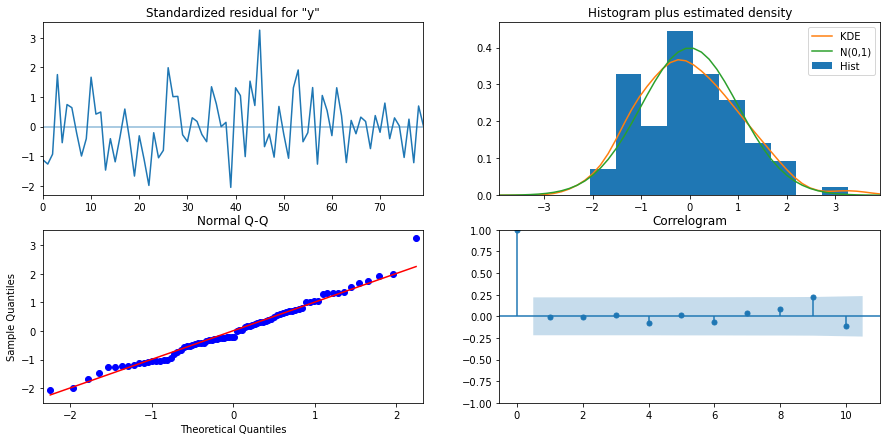

In [135]:
results_auto_SARIMA.plot_diagnostics();

In [136]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [137]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,45.228241,14.458775,16.889562,73.566919
1,63.054698,14.503678,34.628011,91.481385
2,68.118193,14.453738,39.789387,96.446998
3,61.826668,14.449975,33.505236,90.148099
4,68.436677,14.470490,40.075038,96.798316


In [138]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 16.779475413404892 
MAPE: 26.12237748050385


In [139]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(3,1,1)(3,1,1,12)'])
resultsDf2 = pd.concat([resultsDf2,temp_resultsDf])
resultsDf2

,RMSE,MAPE
"ARIMA(2,1,3)",36.765572,75.663871
"ARIMA(3,1,3)",36.650007,75.356651
"SARIMA(3,1,1)(3,1,1,12)",16.779475,26.122377


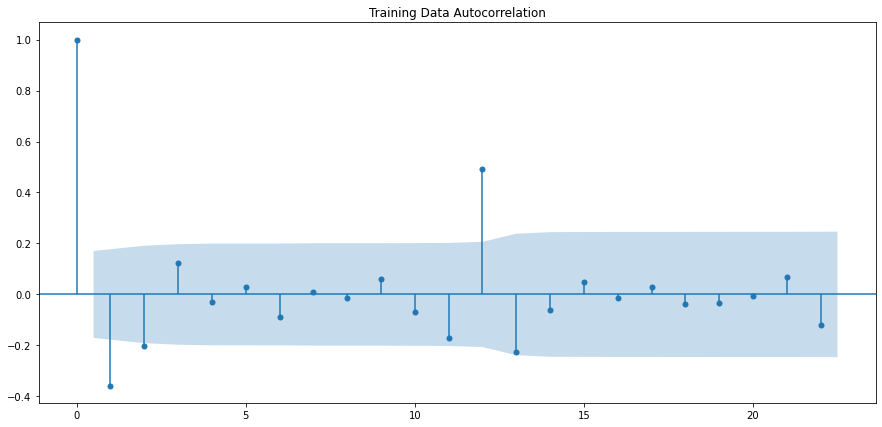

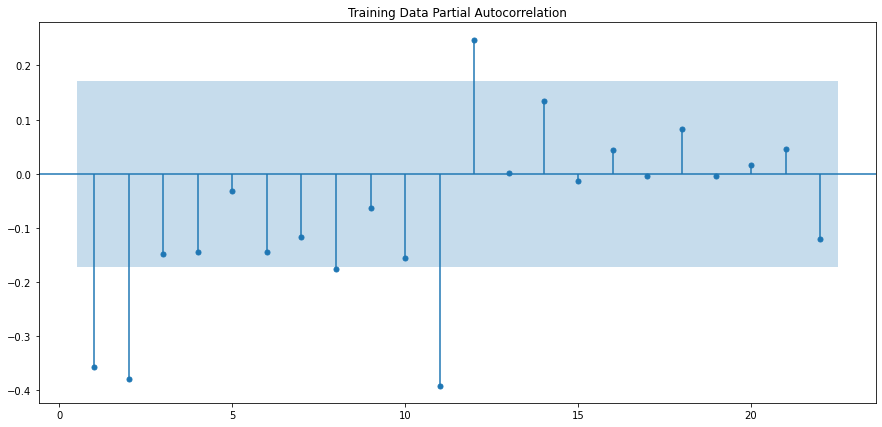

In [140]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

In [141]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(3,1,3),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 1, [1, 2], 12)   Log Likelihood                -328.986
Date:                                 Tue, 13 Dec 2022   AIC                            681.972
Time:                                         06:25:13   BIC                            710.556
Sample:                                     01-31-1980   HQIC                           693.432
                                          - 12-31-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7781      0.177    -10.045      0.000      -2.125      -1

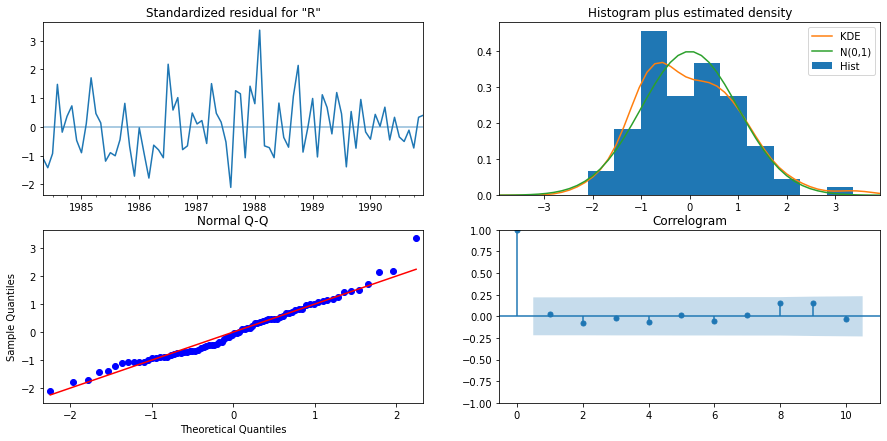

In [142]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [143]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [144]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 17.190219758535456 
MAPE: 26.282624049198045


In [145]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(3,1,2,12)'])
resultsDf2 = pd.concat([resultsDf2,temp_resultsDf])
resultsDf2

,RMSE,MAPE
"ARIMA(2,1,3)",36.765572,75.663871
"ARIMA(3,1,3)",36.650007,75.356651
"SARIMA(3,1,1)(3,1,1,12)",16.779475,26.122377
"SARIMA(3,1,3)(3,1,2,12)",17.190220,26.282624


In [146]:
full_data_model = sm.tsa.statespace.SARIMAX(df2['Rose'],
                                order=(3,1,1),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -540.791
Date:                            Tue, 13 Dec 2022   AIC                           1099.582
Time:                                    06:25:22   BIC                           1125.730
Sample:                                01-31-1980   HQIC                          1110.208
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0371      0.112      0.331      0.741      -0.183       0.257
ar.L2         -0.0200      0.110   

In [147]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [148]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,44.170903,12.948825,18.791672,69.550134
1995-09-30,44.610580,13.086975,18.960580,70.260581
1995-10-31,45.960469,13.144399,20.197919,71.723018
1995-11-30,58.172205,13.192808,32.314777,84.029633
1995-12-31,85.621111,13.265859,59.620504,111.621717


In [149]:
rmse = mean_squared_error(df2['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 34.25536339705066


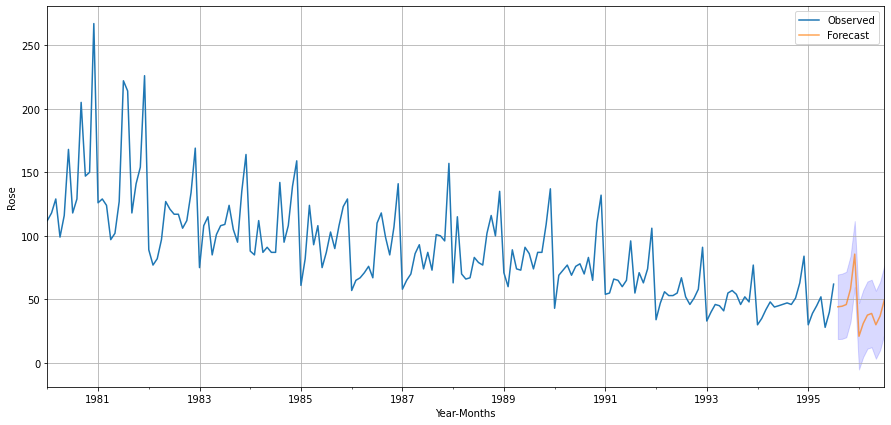

In [150]:
axis = df2['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid();

Text(0.5, 1.0, 'Rose : 12 Months Forecast')

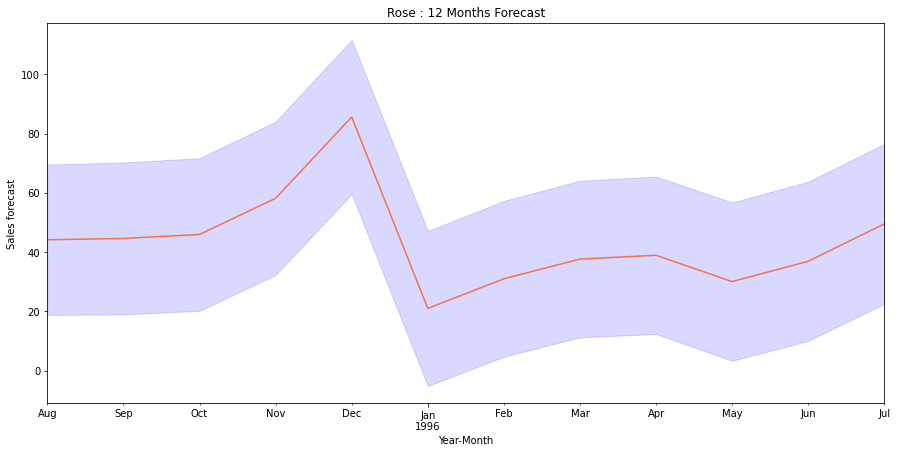

In [151]:
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('Rose : 12 Months Forecast', fontsize=12)

In [152]:
forecast = pd.DataFrame({'Rose':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast

,Rose
1995-08-31,44.17
1995-09-30,44.61
1995-10-31,45.96
1995-11-30,58.17
1995-12-31,85.62
1996-01-31,20.98
1996-02-29,31.00
1996-03-31,37.65
1996-04-30,38.93
1996-05-31,30.05


In [153]:
np.sum(forecast['Rose'])

523.5899999999999

In [154]:
forecast.describe()

,Rose
count,12.000000
mean,43.632500
std,16.449366
min,20.980000
25%,35.425000
50%,41.550000
75%,46.857500
max,85.620000


In [155]:
resultsDf2

,RMSE,MAPE
"ARIMA(2,1,3)",36.765572,75.663871
"ARIMA(3,1,3)",36.650007,75.356651
"SARIMA(3,1,1)(3,1,1,12)",16.779475,26.122377
"SARIMA(3,1,3)(3,1,2,12)",17.190220,26.282624


In [156]:
resultsDf = pd.concat([resultsDf2,resultsDf])
resultsDf

,RMSE,MAPE
"ARIMA(2,1,3)",36.765572,75.663871
"ARIMA(3,1,3)",36.650007,75.356651
"SARIMA(3,1,1)(3,1,1,12)",16.779475,26.122377
"SARIMA(3,1,3)(3,1,2,12)",17.190220,26.282624
RegressionOnTime,15.255435,NaN
NaiveModel,79.672238,NaN
SimpleAverageModel,53.413057,NaN
2pointTrailingMovingAverage,11.529994,NaN
4pointTrailingMovingAverage,14.444342,NaN
6pointTrailingMovingAverage,14.554944,NaN
